# Dinucleotide deletions - repeat context analysis

Dinucleotide deletions in WGS datasets.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.utils import df_to_group_counts
%matplotlib inline

out_dir = "outputs/two_bp_deletion_categories"
os.makedirs(out_dir, exist_ok=True)

In [2]:
def count_two_bp_repeat_categories(df, groupby=[]):
    two_bp_dels = df[df.cosmic_class.str.startswith('2:Del')].copy().reset_index()
    two_bp_dels['repeat_category'] = two_bp_dels.cosmic_class.apply(
        lambda x: 
        'SNMH' if x.split(':')[2] == 'M'
        else 'STR' if int(x.split(':')[-1]) >= 5
        else 'SSTR' if int(x.split(':')[-1]) > 0 
        else 'No repeat')
    if groupby:
        return df_to_group_counts(
            two_bp_dels,
            groupby + ['repeat_category'])
    counts = two_bp_dels.groupby(['repeat_category']).size().to_frame()
    counts.columns = ['Count']
    counts.reset_index(inplace=True)
    return counts

## RPE1 Mutation Accumulation Experiment

RNASEH2A KO (AKO1_4) and RNASEH2B KO (BKO1_4) vs WT RPE1 cells after long term bottleneck culture (Fig 3).

In [3]:
rpe1_indel_df = pd.read_csv("data/rpe1_bottleneck/rpe1_indels.csv")
rpe1_2bp_del_rpt_counts = count_two_bp_repeat_categories(rpe1_indel_df, groupby=['Status'])
rpe1_2bp_del_rpt_counts.to_csv(
    os.path.join(out_dir, "rpe1_2bp_del_rpt_counts.csv"),
    index=False)
rpe1_2bp_del_rpt_counts

Status repeat_category  Count
0     KO       No repeat   14.0
1     KO            SNMH   30.0
2     KO            SSTR   47.0
3     KO             STR    7.0
4     WT       No repeat    1.0
5     WT            SNMH    4.0
6     WT            SSTR    8.0
7     WT             STR    0.0

Text(0.5, 1.0, 'RPE1 RNase H2 KO/WT 2bp deletion repeat categories')

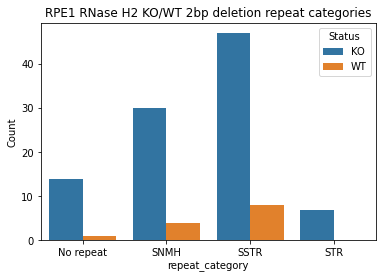

In [4]:
sns.barplot(x='repeat_category',
            y='Count',
            data=rpe1_2bp_del_rpt_counts,
            hue='Status')
plt.title("RPE1 RNase H2 KO/WT 2bp deletion repeat categories")

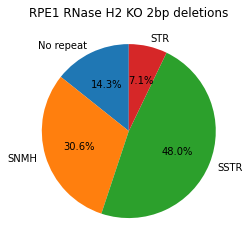

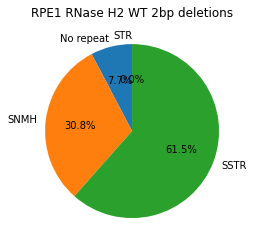

In [5]:
for stat in rpe1_2bp_del_rpt_counts.Status.unique():
    plt.pie(rpe1_2bp_del_rpt_counts[rpe1_2bp_del_rpt_counts.Status == stat].Count,
            labels=rpe1_2bp_del_rpt_counts[rpe1_2bp_del_rpt_counts.Status == stat].repeat_category,
            autopct='%1.1f%%',
            startangle=90)
    plt.title("RPE1 RNase H2 {} 2bp deletions".format(stat))
    plt.show()

## RNase H2 Null Mouse Tumours



In [6]:
ms_indel_df = pd.read_csv("data/mouse_rnaseh2null_tumours/mouse_tumour_indels.csv")
ms_2bp_del_rpt_counts = count_two_bp_repeat_categories(ms_indel_df)
ms_2bp_del_rpt_counts.to_csv(
    os.path.join(out_dir, "mouse_tumour_2bp_del_rpt_counts.csv"),
    index=False)
ms_2bp_del_rpt_counts

repeat_category  Count
0       No repeat     27
1            SNMH     77
2            SSTR    117
3             STR      7

Text(0.5, 1.0, 'RNase H2 Null Mouse Tumour Somatic 2bp deletions')

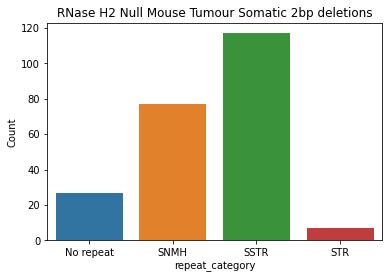

In [7]:
sns.barplot(x='repeat_category',
            y='Count',
            data=ms_2bp_del_rpt_counts)
plt.title("RNase H2 Null Mouse Tumour Somatic 2bp deletions")

Text(0.5, 1.0, 'RNase H2 Null Mouse Tumour Somatic 2bp deletions')

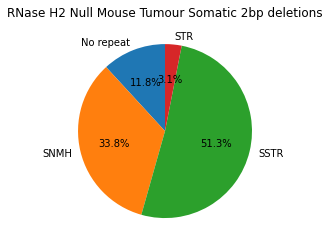

In [8]:
plt.pie(ms_2bp_del_rpt_counts.Count,
        labels=ms_2bp_del_rpt_counts.repeat_category,
        autopct='%1.1f%%',
        startangle=90)
plt.title("RNase H2 Null Mouse Tumour Somatic 2bp deletions")

## Gene4Denovo



In [9]:
g4d_indel_df = pd.read_csv("data/gene4denovo/gene4denovo_indels.csv")
g4d_2bp_del_rpt_counts = count_two_bp_repeat_categories(g4d_indel_df)
g4d_2bp_del_rpt_counts.to_csv(
    os.path.join(out_dir, "gene4denovo_2bp_del_rpt_counts.csv"),
    index=False)
g4d_2bp_del_rpt_counts

repeat_category  Count
0       No repeat   1182
1            SNMH   1093
2            SSTR   1952
3             STR   1342

Text(0.5, 1.0, 'Gene4Denovo 2bp deletions')

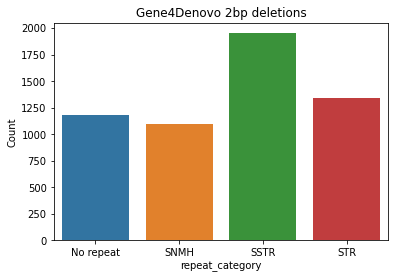

In [10]:
sns.barplot(x='repeat_category',
            y='Count',
            data=g4d_2bp_del_rpt_counts)
plt.title("Gene4Denovo 2bp deletions")

Text(0.5, 1.0, 'Gene4Denovo 2bp deletions')

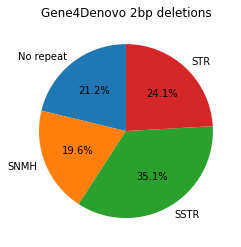

In [11]:
plt.pie(g4d_2bp_del_rpt_counts.Count,
        labels=g4d_2bp_del_rpt_counts.repeat_category,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Gene4Denovo 2bp deletions")